In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf
from sklearn import model_selection
from IPython.display import display, HTML
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import DeepGraphCNN
from stellargraph import StellarGraph
from stellargraph import datasets
import networkx as nx
from stellargraph.data import BiasedRandomWalk
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os
import random
import stellargraph as sg
from stellargraph.data import UnsupervisedSampler
from stellargraph.mapper import Attri2VecLinkGenerator, Attri2VecNodeGenerator
from stellargraph.layer import Attri2Vec, link_classification
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random
from tensorflow import keras
from stellargraph import globalvar

In [2]:
#import domain data

domain =  pd.read_csv('domain.csv',nrows=250)

In [3]:
#explore the data types of the dataframe

domain.dtypes

Unnamed: 0                 int64
id                         int64
host                      object
port                       int64
ssl                        int64
is_up                      int64
created_at                object
visited_at                object
title                     object
last_alive                object
is_crap                    int64
is_genuine                 int64
is_fake                    int64
ssh_fingerprint          float64
is_subdomain               int64
server                    object
powered_by                object
dead_in_a_row              int64
next_scheduled_check      object
is_banned                  int64
portscanned_at            object
path_scanned_at           object
useful_404_scanned_at     object
useful_404                 int64
useful_404_php             int64
useful_404_dir             int64
clone_group              float64
new_clone_group          float64
ban_exempt                 int64
manual_genuine             int64
language  

In [4]:

domain.head(3)

,Unnamed: 0,id,host,port,ssl,is_up,created_at,visited_at,title,last_alive,...,useful_404_php,useful_404_dir,clone_group,new_clone_group,ban_exempt,manual_genuine,language,description_json,description_json_at,whatweb_at
0,0,304845,vfgop7uag7dpxuxq.onion,80,0,0,2020-04-17 07:43:31,2020-06-22 04:24:01,The Pot Shop – Best Pot Ever,2020-06-02 06:50:56,...,1,0,NaN,NaN,0,0,NaN,NaN,2020-05-28 01:50:52,1970-01-01 00:00:00
1,1,304846,dcounter3sjplzorng2oekjmt6xdaa5qkdc3guypuqranj...,80,0,0,2020-04-17 07:43:33,2020-07-09 22:46:42,NaN,1970-01-01 00:00:00,...,0,0,NaN,NaN,0,0,NaN,NaN,1970-01-01 00:00:00,1970-01-01 00:00:00
2,2,304847,buygc467q5ez2fg7.onion,80,0,0,2020-04-17 07:43:34,2020-06-22 04:24:01,Amazon Gift Cards,2020-05-22 06:40:58,...,0,1,NaN,NaN,0,0,en,NaN,2020-05-20 10:38:16,1970-01-01 00:00:00


In [5]:
domain =  domain.fillna('0')

In [6]:
domain.head(3)

,Unnamed: 0,id,host,port,ssl,is_up,created_at,visited_at,title,last_alive,...,useful_404_php,useful_404_dir,clone_group,new_clone_group,ban_exempt,manual_genuine,language,description_json,description_json_at,whatweb_at
0,0,304845,vfgop7uag7dpxuxq.onion,80,0,0,2020-04-17 07:43:31,2020-06-22 04:24:01,The Pot Shop – Best Pot Ever,2020-06-02 06:50:56,...,1,0,0,0,0,0,0,0,2020-05-28 01:50:52,1970-01-01 00:00:00
1,1,304846,dcounter3sjplzorng2oekjmt6xdaa5qkdc3guypuqranj...,80,0,0,2020-04-17 07:43:33,2020-07-09 22:46:42,0,1970-01-01 00:00:00,...,0,0,0,0,0,0,0,0,1970-01-01 00:00:00,1970-01-01 00:00:00
2,2,304847,buygc467q5ez2fg7.onion,80,0,0,2020-04-17 07:43:34,2020-06-22 04:24:01,Amazon Gift Cards,2020-05-22 06:40:58,...,0,1,0,0,0,0,en,0,2020-05-20 10:38:16,1970-01-01 00:00:00


In [7]:
domain.server

0       nginx/1.14.0 (Ubuntu)
1                           0
2                 nginx/1.6.2
3                       nginx
4                       nginx
                ...          
245        openresty/1.15.8.2
246    Apache/2.4.29 (Ubuntu)
247                    Apache
248                    Apache
249                    Apache
Name: server, Length: 250, dtype: object

In [8]:
domain.description_json

0      0
1      0
2      0
3      0
4      0
      ..
245    0
246    0
247    0
248    0
249    0
Name: description_json, Length: 250, dtype: object

In [9]:
domain.description_json_at

0      2020-05-28 01:50:52
1      1970-01-01 00:00:00
2      2020-05-20 10:38:16
3      2020-06-02 05:22:23
4      2020-05-03 12:13:05
              ...         
245    2020-06-22 05:19:00
246    2020-06-09 17:34:20
247    2020-05-01 15:22:48
248    2020-05-01 15:22:19
249    2020-05-10 01:58:03
Name: description_json_at, Length: 250, dtype: object

In [10]:
domain.whatweb_at

0      1970-01-01 00:00:00
1      1970-01-01 00:00:00
2      1970-01-01 00:00:00
3      1970-01-01 00:00:00
4      1970-01-01 00:00:00
              ...         
245    1970-01-01 00:00:00
246    1970-01-01 00:00:00
247    1970-01-01 00:00:00
248    1970-01-01 00:00:00
249    1970-01-01 00:00:00
Name: whatweb_at, Length: 250, dtype: object

In [11]:
domain.language

0       0
1       0
2      en
3      en
4      en
       ..
245    en
246    en
247    en
248    en
249    en
Name: language, Length: 250, dtype: object

In [12]:
domain.columns

Index(['Unnamed: 0', 'id', 'host', 'port', 'ssl', 'is_up', 'created_at',
       'visited_at', 'title', 'last_alive', 'is_crap', 'is_genuine', 'is_fake',
       'ssh_fingerprint', 'is_subdomain', 'server', 'powered_by',
       'dead_in_a_row', 'next_scheduled_check', 'is_banned', 'portscanned_at',
       'path_scanned_at', 'useful_404_scanned_at', 'useful_404',
       'useful_404_php', 'useful_404_dir', 'clone_group', 'new_clone_group',
       'ban_exempt', 'manual_genuine', 'language', 'description_json',
       'description_json_at', 'whatweb_at'],
      dtype='object')

In [13]:
label_encoder = preprocessing.LabelEncoder()
domain['host'] = label_encoder.fit_transform(domain['host'])
domain['port'] = label_encoder.fit_transform(domain['port'])
domain['ssl'] = label_encoder.fit_transform(domain['ssl'])
domain['is_up'] = label_encoder.fit_transform(domain['is_up'])
domain['created_at'] = label_encoder.fit_transform(domain['created_at'])
domain['visited_at'] = label_encoder.fit_transform(domain['visited_at'])
domain['last_alive'] = label_encoder.fit_transform(domain['last_alive'])
domain['is_crap'] = label_encoder.fit_transform(domain['is_crap'])
domain['is_genuine'] = label_encoder.fit_transform(domain['is_genuine'])
domain['is_fake'] = label_encoder.fit_transform(domain['is_fake'])
domain['ssh_fingerprint'] = label_encoder.fit_transform(domain['ssh_fingerprint'])
domain['is_subdomain'] = label_encoder.fit_transform(domain['is_subdomain'])
domain['server'] = label_encoder.fit_transform(domain['server'])
domain['powered_by'] = label_encoder.fit_transform(domain['powered_by'])
domain['dead_in_a_row'] = label_encoder.fit_transform(domain['dead_in_a_row'])
domain['next_scheduled_check'] = label_encoder.fit_transform(domain['next_scheduled_check'])
domain['is_banned'] = label_encoder.fit_transform(domain['is_banned'])
domain['portscanned_at'] = label_encoder.fit_transform(domain['portscanned_at'])
domain['path_scanned_at'] = label_encoder.fit_transform(domain['path_scanned_at'])
domain['useful_404_scanned_at'] = label_encoder.fit_transform(domain['useful_404_scanned_at'])
domain['useful_404'] = label_encoder.fit_transform(domain['useful_404'])
domain['useful_404_dir'] = label_encoder.fit_transform(domain['useful_404_dir'])
domain['clone_group'] = label_encoder.fit_transform(domain['clone_group'])
domain['new_clone_group'] = label_encoder.fit_transform(domain['new_clone_group'])
domain['ban_exempt'] = label_encoder.fit_transform(domain['ban_exempt'])
domain['manual_genuine'] = label_encoder.fit_transform(domain['manual_genuine'])
domain['language'] = label_encoder.fit_transform(domain['language'])
domain['description_json'] = label_encoder.fit_transform(domain['description_json'])
domain['description_json_at'] = label_encoder.fit_transform(domain['description_json_at'])
domain['whatweb_at'] = label_encoder.fit_transform(domain['whatweb_at'])

In [14]:
domainNew = domain[['host','port','ssl','is_up','created_at','visited_at','last_alive','is_crap',
                   'is_genuine','is_fake','ssh_fingerprint','is_subdomain','server','powered_by',
                    'dead_in_a_row','next_scheduled_check','is_banned','portscanned_at','path_scanned_at',
                    'useful_404_scanned_at','useful_404','useful_404_dir','clone_group','new_clone_group','ban_exempt',
                    'manual_genuine','language','description_json','description_json_at','whatweb_at'
                   ]]

In [15]:
domainNew.head()

,host,port,ssl,is_up,created_at,visited_at,last_alive,is_crap,is_genuine,is_fake,...,useful_404,useful_404_dir,clone_group,new_clone_group,ban_exempt,manual_genuine,language,description_json,description_json_at,whatweb_at
0,219,0,0,0,0,14,134,0,0,0,...,1,0,0,0,0,0,0,0,132,0
1,69,0,0,0,1,119,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,55,0,0,0,2,14,87,0,0,0,...,1,1,0,0,0,0,2,0,90,0
3,214,0,0,0,3,20,129,0,0,0,...,0,0,0,0,0,0,2,0,134,0
4,10,0,0,0,4,14,25,0,0,0,...,1,1,0,0,0,0,2,0,24,0


### T-SNE

T-SNE

The page data set contains lots of dimension such as( 'url', 'title', 'code', 'domain', 'created_at',
 'visited_at', 'is_frontpage', 'size', 'path'), By using the T-SNE algorithm it was redacted to 2 and project that input space to hierarchical clustering agglomerative (single, complete, ward, average). 
The reason being the HC is to identify page clusters and based on their qualities then identify the page clusters using the wallet types of the bitcoin addresses. 


In [16]:
GT_TSNE = TSNE(n_components=2).fit_transform(domainNew)

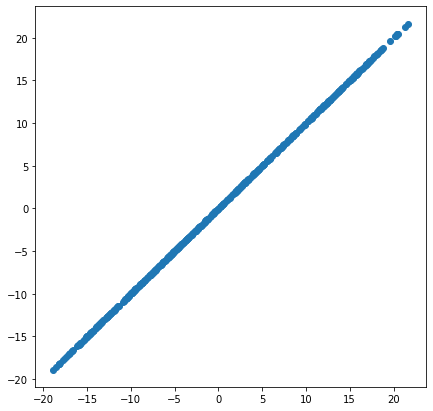

In [18]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter([i for i in GT_TSNE], [i for i in GT_TSNE])
plt.show()

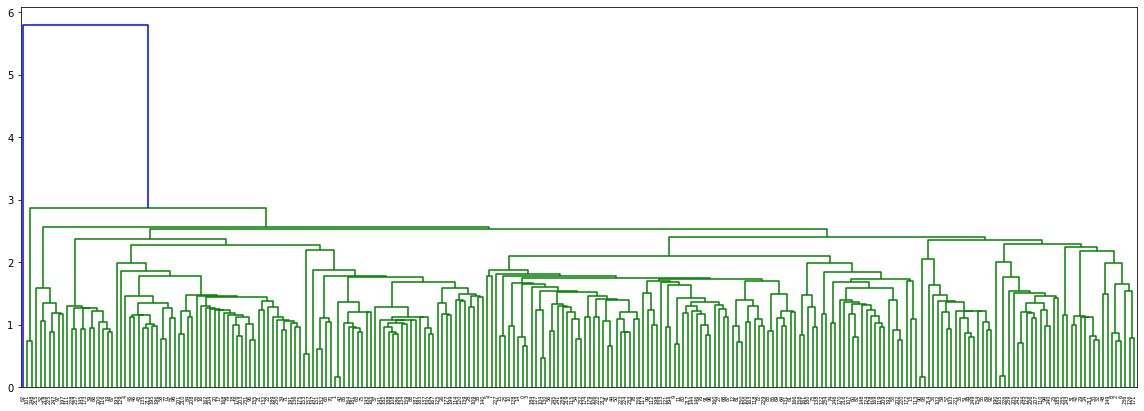

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(GT_TSNE, 'single')

labelList = range(len(GT_TSNE))

plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

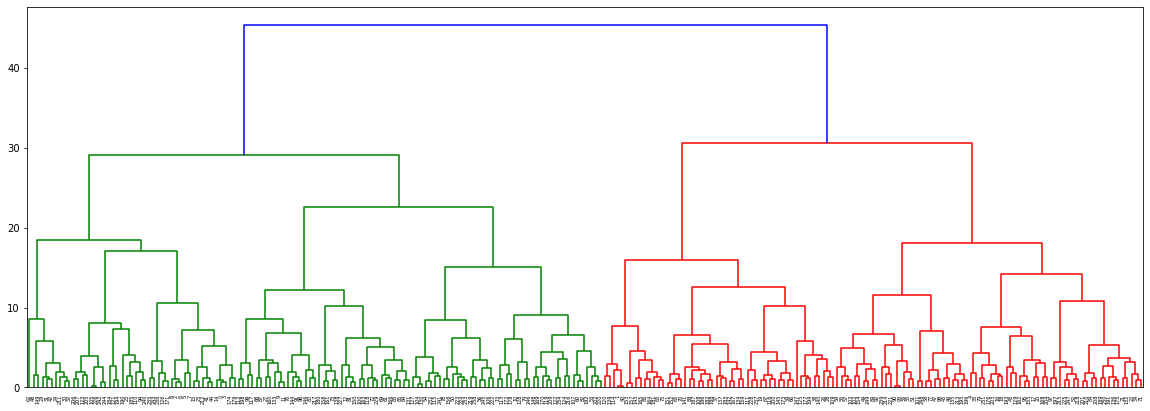

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(GT_TSNE, 'complete')

labelList = range(len(GT_TSNE))

plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

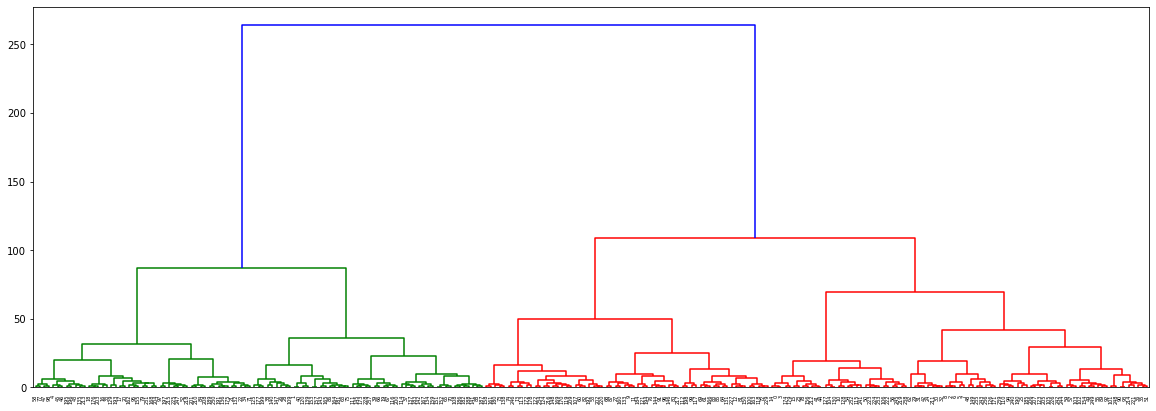

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(GT_TSNE, 'ward')

labelList = range(len(GT_TSNE))

plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

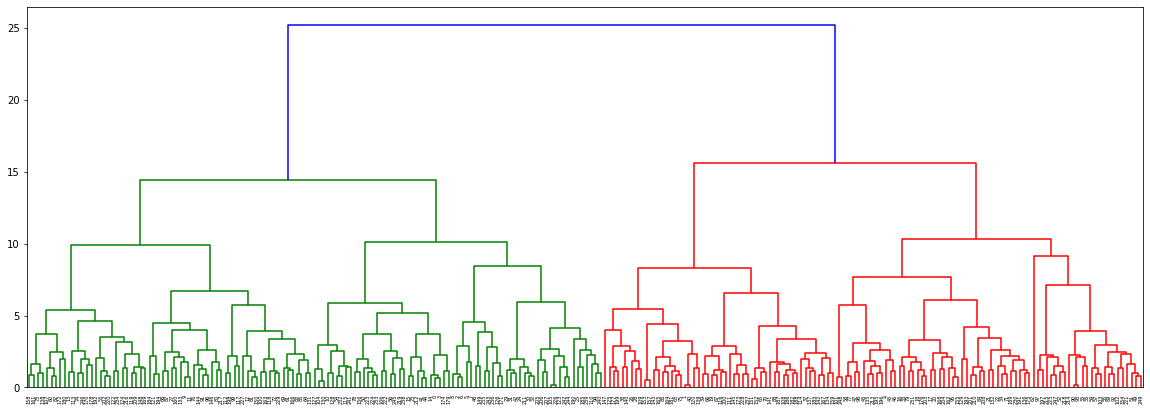

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(GT_TSNE, 'average')

labelList = range(len(GT_TSNE))

plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()